In [174]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import os.path as osp
import cartopy.crs as ccrs
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.geometry import Point, LineString, Polygon

In [188]:
voronoi = gpd.read_file('/home/fiona/birdMigration/data/raw/radar/fall/2015/voronoi_test.shp').to_crs(epsg='4326')
crs_proj4 = ccrs.AlbersEqualArea().proj4_init

d = '/home/fiona/birdMigration/data/shapes'
countries = gpd.read_file(osp.join(d, 'ne_10m_admin_0_countries_lakes.shp'))
extent = [-1.1, 45.16, 17.27, 56.60]
margin = 4
extent = [extent[0]-margin, extent[1]-margin, extent[2]+margin, extent[3]+margin]

In [211]:
delta_lon, delta_lat = 10, 4
p1 = Point(extent[0] + delta_lon, extent[3] + delta_lat)
p1 = gpd.GeoSeries([p1], crs='EPSG:4326').to_crs(crs_proj4)
boundary = gpd.GeoSeries([Polygon([Point(extent[0], extent[1]), Point(extent[0], extent[3]), 
                                  Point(extent[2], extent[3]), Point(extent[2], extent[1])])], crs='EPSG:4326').to_crs(crs_proj4)
p1 = np.array([p1.geometry.x, p1.geometry.y]).flatten()

alpha = np.deg2rad(230 + 90)
l = 5_000_000
p2 = p1 - np.array([l*np.sin(alpha), l*np.cos(alpha)])

line = LineString([Point(*list(p1)), Point(*list(p2))]).intersection(boundary.iloc[0])
df_line = gpd.GeoDataFrame(geometry=[line], crs=crs_proj4)

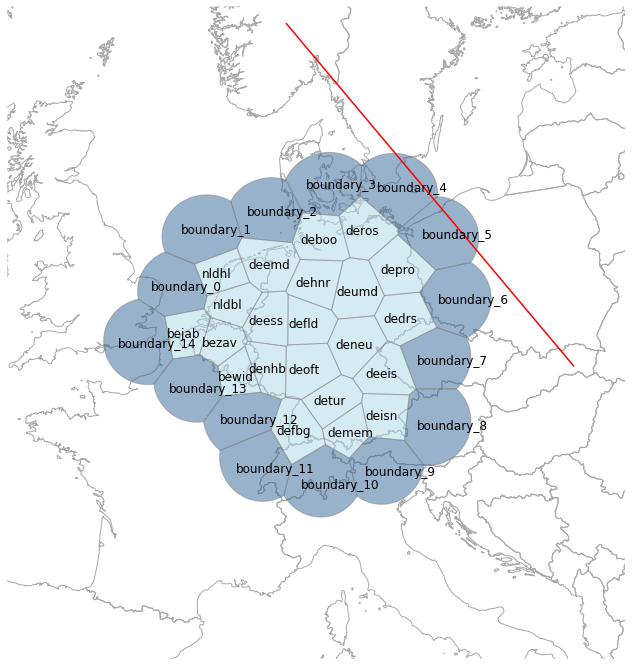

In [212]:
fig, ax = plt.subplots(figsize=(12,12), subplot_kw = {'projection' : gcrs.AlbersEqualArea()})
gplt.polyplot(countries, ax=ax, edgecolor="darkgray", extent=extent, zorder=1)
gplt.polyplot(voronoi.query('boundary == 1'), ax=ax, edgecolor="gray", facecolor='#336699', alpha=0.5, extent=extent, zorder=2)
gplt.polyplot(voronoi.query('boundary == 0'), ax=ax, edgecolor="gray", facecolor='lightblue', alpha=0.5, extent=extent, zorder=2)
df_line.plot(ax=ax, color='red', zorder=3)

centroids = voronoi.to_crs(crs_proj4).centroid

for x, y, label in zip(centroids.geometry.x, centroids.geometry.y, voronoi.radar):
    ax.annotate(label, xy=(x, y), xytext=(-20, -5), textcoords="offset points", fontsize=12);
#fig.savefig('/home/fiona/birdMigration/data/plots/presentations/voronoi_with_dummy_radars.png', bbox_inches='tight', dpi=300)

In [12]:
voronoi = gpd.read_file('/home/fiona/birdMigration/data/raw/radar/fall/2015/voronoi.shp').to_crs(epsg='4326')
crs_proj4 = ccrs.AlbersEqualArea().proj4_init

d = '/home/fiona/birdMigration/data/shapes'
countries = gpd.read_file(osp.join(d, 'ne_10m_admin_0_countries_lakes.shp'))
extent = [-1.1, 45.16, 17.27, 56.60]

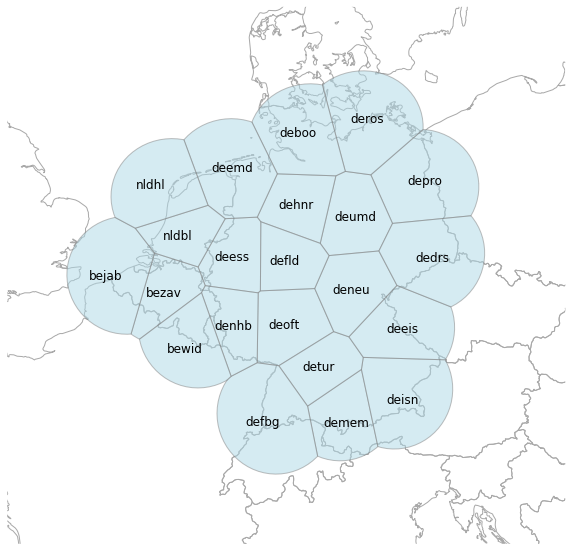

In [14]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw = {'projection' : gcrs.AlbersEqualArea()})
gplt.polyplot(countries, ax=ax, edgecolor="darkgray", extent=extent, zorder=1)
gplt.polyplot(voronoi, ax=ax, edgecolor="gray", facecolor='lightblue', alpha=0.5, extent=extent, zorder=2)

centroids = voronoi.to_crs(crs_proj4).centroid

for x, y, label in zip(centroids.geometry.x, centroids.geometry.y, voronoi.radar):
    ax.annotate(label, xy=(x, y), xytext=(-20, -5), textcoords="offset points", fontsize=12);
fig.savefig('/home/fiona/birdMigration/data/plots/presentations/voronoi_tessellation.png', bbox_inches='tight', dpi=300)

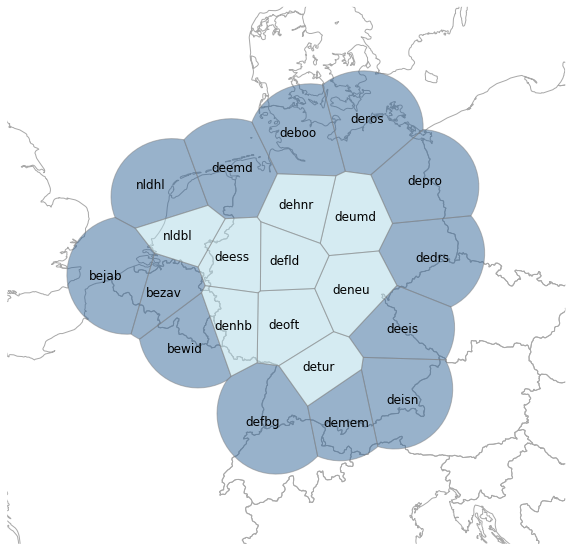

In [13]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw = {'projection' : gcrs.AlbersEqualArea()})
gplt.polyplot(countries, ax=ax, edgecolor="darkgray", extent=extent, zorder=1)
gplt.polyplot(voronoi.query('boundary == 1'), ax=ax, edgecolor="gray", facecolor='#336699', alpha=0.5, extent=extent, zorder=2)
gplt.polyplot(voronoi.query('boundary == 0'), ax=ax, edgecolor="gray", facecolor='lightblue', alpha=0.5, extent=extent, zorder=2)

centroids = voronoi.to_crs(crs_proj4).centroid

for x, y, label in zip(centroids.geometry.x, centroids.geometry.y, voronoi.radar):
    ax.annotate(label, xy=(x, y), xytext=(-20, -5), textcoords="offset points", fontsize=12);
fig.savefig('/home/fiona/birdMigration/data/plots/presentations/voronoi_without_dummy_radars.png', bbox_inches='tight', dpi=300)